<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Final_Risk_Measurement_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initialization

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [84]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

top_features = ['AB.C.alpha.q.T6', 'COH.A.delta.a.FP1.h.T3', 'COH.A.delta.b.FP2.m.T5']
data1 = pd.read_csv('/content/Sheet 1-numericBehaviorWithAgeOnly.csv')

Y = data1['specific_disorder']
X = data1[top_features]

Y = data1['specific_disorder'] == 5

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.664429
         Iterations 5


# OVERALL MODEL ACCURACY

In [85]:
import random
random.seed(16)
np.random.seed(16)
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')

y = df['specific_disorder']

X = df.drop(columns=['specific_disorder'])
X = X[[col for col in X.columns if col in top_features]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc * 100)


[5 5 5 5 5 5 5 4 5 4 5 4 4 5 4 5 5 4 5 5 4 4 5 4 5 5 4 4 4 4 4 4 5 4 4 4 4
 4]
Logistic Regression model accuracy (in %): 52.63157894736842


# Muse Integration

In [86]:
user_data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')


<ipython-input-86-68862582fc80>:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')


In [87]:
row = 0

In [88]:
#Delta TP9-AF8 coherence - corresponds to COH.A.delta.b.FP2.m.T5

from scipy import signal


channel_1 = user_data['Delta_TP9'].values
channel_2 = user_data['Delta_AF8'].values

channel_1 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
channel_2 = np.nan_to_num(channel_2, nan=np.nanmean(channel_2))

fs = 256
f, Cxy = signal.coherence(channel_1, channel_2, fs=fs, nperseg=1024)  # fs is sampling frequency

coherence_data = pd.DataFrame({'Frequency': f, 'Coherence DeltaTP9DeltaAF8': Cxy})

coherence_AF8_TP9 = coherence_data['Coherence DeltaTP9DeltaAF8'].mean()
coherence_AF8_TP9 *=100
print(coherence_AF8_TP9)




#Delta AF7 - TP9 coherence - corresponds to COH.A.delta.a.FP1.h.T3

from scipy import signal

data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')

channel_1 = data['Delta_AF7'].values
channel_2 = data['Delta_TP9'].values

channel_1 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
channel_2 = np.nan_to_num(channel_2, nan=np.nanmean(channel_2))

fs = 256
f, Cxy = signal.coherence(channel_1, channel_2, fs=fs, nperseg=1024)  # fs is sampling frequency

coherence_data = pd.DataFrame({'Frequency': f, 'Coherence DeltaAF7DeltaTP9': Cxy})

coherence_AF7_TP9 = coherence_data['Coherence DeltaAF7DeltaTP9'].mean()
coherence_AF7_TP9 *=100
print(coherence_AF7_TP9)

13.916182133081339
5.851293322892614


<ipython-input-88-cecfc1d9f9cc>:28: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')


In [89]:
#COH.A.delta.b.FP2.m.T5
X = data1['COH.A.delta.b.FP2.m.T5']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

print(X.mean())


prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.b.FP2.m.T5': [coherence_AF8_TP9]})
print(result.summary())

pred = result.get_prediction(prediction_data)
print("output" + str(pred.predicted))


risk1 = -0.0172*(coherence_AF8_TP9) + 0.1521
risk1_sigmoid = p = 1 / (1 + np.exp(-risk1))
print(risk1_sigmoid)

#Note: significant difference between equation-based prediction and pred.predicted_mean[0]

Optimization terminated successfully.
         Current function value: 0.688462
         Iterations 4
10.196074590425532
                           Logit Regression Results                           
Dep. Variable:      specific_disorder   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                0.006679
Time:                        04:08:39   Log-Likelihood:                -129.43
converged:                       True   LL-Null:                       -130.30
Covariance Type:            nonrobust   LLR p-value:                    0.1871
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1521      0.197      0.771      0.44

In [90]:
print(pred.predicted)

[0.47836709]


In [91]:
#COH.A.delta.a.FP1.h.T3
Y = data1['specific_disorder'] == 5
X = data1['COH.A.delta.a.FP1.h.T3']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()



prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.a.FP1.h.T3': [coherence_AF7_TP9]})

pred = result.get_prediction(prediction_data)
print(result.summary())
print(pred.predicted)
#risk2 = pred.predicted_mean[0]

risk2 =  0.0149*(coherence_AF7_TP9) - 0.5939
risk2_sigmoid = p = 1 / (1 + np.exp(-risk2))
print(risk2_sigmoid)




Optimization terminated successfully.
         Current function value: 0.686978
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      specific_disorder   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                0.008819
Time:                        04:08:39   Log-Likelihood:                -129.15
converged:                       True   LL-Null:                       -130.30
Covariance Type:            nonrobust   LLR p-value:                    0.1295
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.5939      0.409     -1.454      0.146      -1.395      

In [92]:
#AB.C.alpha.q.T6
Y = data1['specific_disorder'] == 5
X = data1['AB.C.alpha.q.T6']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()
print(result.summary())


Delta_TP10 = user_data['Delta_TP10'].values
Delta_TP10 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
Delta_TP10 = Delta_TP10.mean()

prediction_data = pd.DataFrame({'const': [1], 'AB.C.alpha.q.T6': [Delta_TP10]})

pred = result.get_prediction(prediction_data)
print(pred.predicted)

#risk3 = pred.predicted_mean[0]
risk3 = -0.0097 *data['Delta_TP10'].mean() + 0.1531
risk3_sigmoid = p = 1 / (1 + np.exp(-risk3))
print(risk3_sigmoid)

Optimization terminated successfully.
         Current function value: 0.687085
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      specific_disorder   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                0.008665
Time:                        04:08:39   Log-Likelihood:                -129.17
converged:                       True   LL-Null:                       -130.30
Covariance Type:            nonrobust   LLR p-value:                    0.1329
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1531      0.188      0.814      0.416      -0.216       0.522
AB.C.alpha.q.T

#Result


In [93]:
risk_sigmoid_total =  (risk3_sigmoid + risk2_sigmoid + risk1_sigmoid)/3
print(risk_sigmoid_total)


output = "";
if risk_sigmoid_total<0.5:
  output = "You are " + str((0.5 - risk_sigmoid_total)*100) +" percent points below the average risk for IAD. "
if risk_sigmoid_total>0.5:
  output = "You are " + str((risk_sigmoid_total - 0.5)*100) +"percent points above the average risk for IAD."
if risk_sigmoid_total == 0.5:
  output = "You are at the average risk for IAD."

print(output)
print(risk_sigmoid_total)

#equation based: 25.56406586142109% less likely
#prediction fuction based: 15.022754660005367% more likely


0.46365737288580605
You are 3.634262711419395 percent points below the average risk for IAD. 
0.46365737288580605


#User Output

You are 3.634262711419395 percent points below the average risk for IAD. 


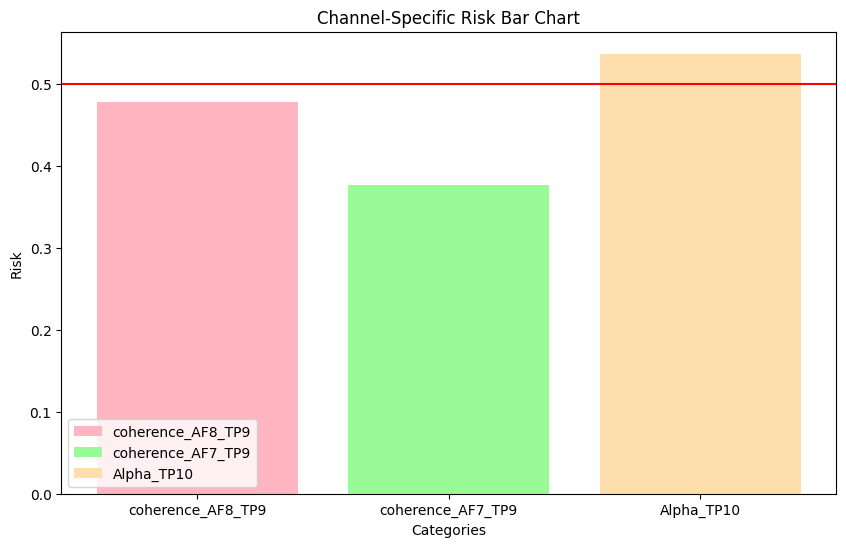

In [94]:
print(output)


# Sample data
categories = ['coherence_AF8_TP9', 'coherence_AF7_TP9', 'Alpha_TP10']
values = [risk1_sigmoid, risk2_sigmoid, risk3_sigmoid]
colors = ['lightpink', 'palegreen', 'navajowhite', 'violet']


# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(categories, values, color=colors)
line = plt.axhline(y=0.5, color='r', linestyle='-', label='y=average IAD risk')
plt.legend(bars, categories)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Risk')
plt.title('Channel-Specific Risk Bar Chart')

# Show the plot
plt.show()







Optimization terminated successfully.
         Current function value: 0.648650
         Iterations 5


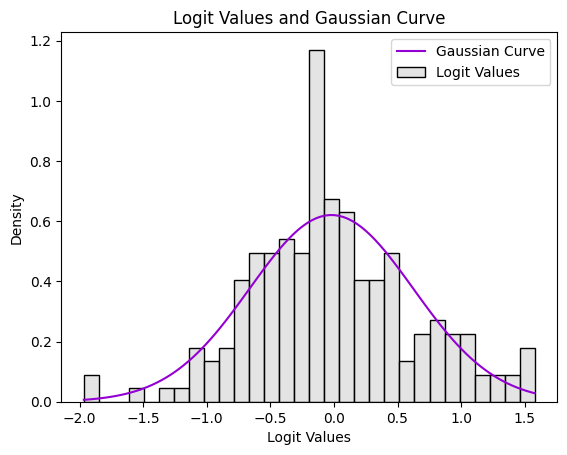

In [95]:
#COH.A.delta.a.FP1.b.FP2
#COH.A.delta.a.FP1.b.FP2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm

X = data1[['COH.A.delta.a.FP1.b.FP2', 'COH.A.delta.f.F4.h.T3', 'AB.C.alpha.q.T6', 'AB.B.theta.c.F7']] # Changed tuple to a list

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()



prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.a.FP1.b.FP2': [coherence_AF8_AF7]})

logit_values = result.fittedvalues

x_vals = np.linspace(min(logit_values), max(logit_values), 100)

mu, std = np.mean(logit_values), np.std(logit_values)

gaussian_curve = norm.pdf(x_vals, mu, std)

sns.histplot(logit_values, kde=False, bins=30, color='gainsboro', stat='density', label="Logit Values")

plt.plot(x_vals, gaussian_curve, color='darkviolet', label='Gaussian Curve')

plt.xlabel('Logit Values')
plt.ylabel('Density')
plt.title('Logit Values and Gaussian Curve')
plt.legend()

plt.show()


